## **Spring 2023 : CS5720**


### Neural Networks & Deep Learning ICP_6 : Jahnavi Chadalavada (700728443) 


### Mount Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/Neural_Networks') 


Mounted at /Neural_Networks


### Predicting the diabetes disease
### Accuracy with 1 hidden layer is around 65%

In [ ]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

path_to_diabetes_csv = '/Neural_Networks/MyDrive/Colab Notebooks/NN/diabetes.csv'
dataset = pd.read_csv(path_to_diabetes_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=87)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 0s 2ms/step - loss: 0.6686 - acc: 0.6510
[0.6686444878578186, 0.6510416865348816]


### 1. Add more Dense layers to the existing code and check how the accuracy changes

### Accuracy with 4 hidden layers is around 70%

In [ ]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

path_to_diabetes_csv = '/Neural_Networks/MyDrive/Colab Notebooks/NN/diabetes.csv'
diabetes_dataset = pd.read_csv(path_to_diabetes_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(diabetes_dataset[:,0:8], diabetes_dataset[:,8],test_size=0.25, random_state=87)

diabetes_nn = Sequential() # create model
diabetes_nn.add(Dense(20, input_dim=8, activation='relu')) #  # hidden layer 1
diabetes_nn.add(Dense(20, activation='relu')) # hidden layer 2
diabetes_nn.add(Dense(20, activation='relu')) # hidden layer 3
diabetes_nn.add(Dense(20, activation='relu')) # hidden layer 4
diabetes_nn.add(Dense(1, activation='sigmoid')) # output layer
diabetes_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
diabetes_nn_fitted = diabetes_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(diabetes_nn.summary())
print(diabetes_nn.evaluate(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 20)                180       
                                                                 
 dense_54 (Dense)            (None, 20)                420       
                                                                 
 dense_55 (Dense)            (None, 20)                420       
                                                                 
 dense_56 (Dense)            (None, 20)                420       
                                                                 
 dense_57 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,461
Trainable params: 1,461
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 0s 3ms/

### 2. Change the data source to Breast Cancer dataset * available in the source code folder and make required changes.Report accuracy of the model.

### Accuracy without scaling is around 65%

In [ ]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

path_to_BreastCancer_csv = '/Neural_Networks/MyDrive/Colab Notebooks/NN/breastcancer.csv'
bc_dataset = pd.read_csv(path_to_BreastCancer_csv)
bc_dataset=bc_dataset.dropna(how='all', axis=1) #drop empty column

labelencoder = LabelEncoder() # one hot encoding
bc_dataset['diagnosis'] = labelencoder.fit_transform(bc_dataset['diagnosis']) # Assigning numerical values 

predictors = bc_dataset.drop(["id","diagnosis",],axis=1)
target = bc_dataset["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors,target, test_size=0.25, random_state=87)

# print(X_train.shape,X_test.shape)
# print(Y_train.shape,Y_test.shape)

bc_dataset_nn = Sequential() # create model
bc_dataset_nn.add(Dense(40, input_dim=30, activation='relu')) # hidden layer
bc_dataset_nn.add(Dense(1, activation='sigmoid')) # output layer
bc_dataset_nn.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
bc_dataset_nn_fitted = bc_dataset_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(bc_dataset_nn.summary())
print(bc_dataset_nn.evaluate(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 40)                1240      
                                                                 
 dense_29 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.6497 - acc: 0.6503
[0.6497047543525696, 0.6503496766090393]


### 3. Normalize the data before feeding the data to the model and check how the normalization change your accuracy.
### Accuracy with normalization is around 97%

In [ ]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

bc_dataset = pd.read_csv(path_to_BreastCancer_csv)
bc_dataset=bc_dataset.dropna(how='all', axis=1) #drop empty column

labelencoder = LabelEncoder() # one hot encoding
bc_dataset['diagnosis'] = labelencoder.fit_transform(bc_dataset['diagnosis']) # Assigning numerical values 

predictors = bc_dataset.drop(["id","diagnosis",],axis=1)
target = bc_dataset["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors,target, test_size=0.25, random_state=87)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # transform training data
X_test_std= sc.fit_transform(X_test) # transform testing data

bc_dataset_nn = Sequential() # create model
bc_dataset_nn.add(Dense(40, input_dim=30, activation='relu')) # hidden layer
bc_dataset_nn.add(Dense(1, activation='sigmoid')) # output layer
bc_dataset_nn.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
bc_dataset_nn_fitted = bc_dataset_nn.fit(X_train_std, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(bc_dataset_nn.summary())
print(bc_dataset_nn.evaluate(X_test_std, Y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 40)                1240      
                                                                 
 dense_31 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.1020 - acc: 0.9790
[0.10198274999856949, 0.9790209531784058]


## Use Image Classification on the hand written digits data set (mnist)

###Accuracy with scaling is around 98%

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0,validation_data=(test_data, test_labels_one_hot))
print(model.summary())
print(model.evaluate(test_data, test_labels_one_hot))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 512)               262656    
                                                                 
 dense_34 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9836
[0.06944768130779266, 0.9836000204086304]


### 1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.

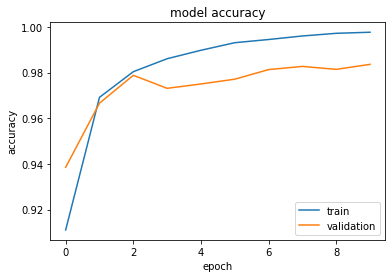

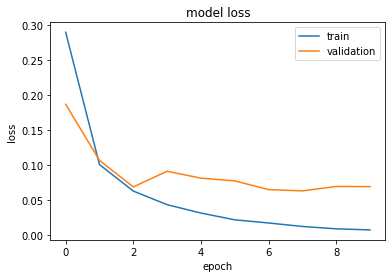

In [ ]:
# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### 2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

The ground truth is 0 and the Model predicted output as [0]


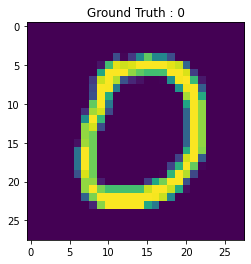

In [ ]:
# plotting image from test_data[10]
plt.imshow(test_data[10].reshape(28,28))
plt.title('Ground Truth : {}'.format(test_labels[10]))


In [ ]:

# Checking model prediction output on test_data[10]
yhat=model.predict(test_data[10].reshape(1,784),verbose=0)
predicted_output=np.argmax(yhat,axis=1)
print(f"The ground truth is {test_labels[10]} and the Model predicted output as {predicted_output}")

The ground truth is 0 and the Model predicted output as [0]


### 3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

### Accuracy with 4 hidden layers is around 97%

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0,validation_data=(test_data, test_labels_one_hot))
print(model.summary())
print(model.evaluate(test_data, test_labels_one_hot))


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               401920    
                                                                 
 dense_36 (Dense)            (None, 512)               262656    
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dense_38 (Dense)            (None, 512)               262656    
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________
None
313/313 [=============================

### 4. Run the same code without scaling the images and check the performance
### Accuracy without scaling is around 96%

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])

train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0,validation_data=(test_data, test_labels_one_hot))
print(model.summary())
print(model.evaluate(test_data, test_labels_one_hot))


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 dense_42 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
313/313 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.9655
[0.4065878689289093, 0.965499997138977]
